Sentiment Analysis of Media Houses: 
The analysis of the Sentiment of the last 100 tweets of the following Media Houses:
BBC, CNN, CBS, FoxNew and New York Times
Also, ploting the overall Sentiment Analysis on each of the above channels.

Observations based on the analysis performed - 
    1. The most positive sentiment is for CBS. 
    2. The most neutral sentiment is that of BBC.
    3. Fox has the most negative sentiments compared to New York Times and CNN respectively.

In [165]:
# Import the Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from os import path, makedirs, remove, rmdir # fetch path and makedirs function from os file


In [166]:
# Import keys from the config file
# from config import consumer_key, consumer_secret, access_token, access_token_secret

In [167]:
# Twitter API Keys
consumer_key = 'b2jDtC9vAdTpnuJDZkNPkwEYF'
consumer_secret = 'xEo1L3eRSaE6J7uOIlYP0ohoNp0jikv3LKunjp9arE0YWn5tVo'
access_token = '57237295-K2EPPUBgXZfz83NuA92RxkzETWThD4YW8lt3bhAcW'
access_token_secret = '9GD3xt89mMZNCKWmDwQvnaWw3tQjaz0vgz4l4d90Fb7N0'

In [168]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [169]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [170]:
# Target Search Term of the various Media Houses
Media_Houses = ("@BBC", "@CBS", "@CNN","@FoxNews", "@nytimes")

# Array to hold the sentiments
Sentiment_array = []

In [171]:
# Extract the first 100 tweets of the Media Houses
print("-----------Start extraction of the tweets posted by the Media Houses!!!-----------")

for user in Media_Houses:
    # Set the tweet count to 100
    tweet_count = 100
    print("Extracting tweets from %s"%user)
    
    # Extract tweets up to 5 pages
    for x in range(5):
        public_tweets = api.user_timeline(user,page = x)
        
        # For each tweet in a bunch of public tweets
        for tweet in public_tweets:
            
            #Calculate the compound, positive, negative and neutral values of each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Save the Tweets in an array as a dictionery item 
            Sentiment_array.append({"Media" : user,
                                    "Tweet Text" : tweet["text"],
                                    "Compound" : compound,
                                    "Positive" : pos,
                                    "Negative" : neg,
                                    "Neutral" : neu,
                                    "Date" : tweet["created_at"],
                                    "Tweets Ago" : tweet_count
                                   })
            
            #Decrease count of tweet by 1 in the reverse order
            tweet_count -= 1

print("-----------End of Extraction of Tweets !!!-----------")

-----------Start extraction of the tweets posted by the Media Houses!!!-----------
Extracting tweets from @BBC
Extracting tweets from @CBS
Extracting tweets from @CNN
Extracting tweets from @FoxNews
Extracting tweets from @nytimes
-----------End of Extraction of Tweets !!!-----------


In [172]:
# Create dataframe from the Dictionery item of the Sentiment Array
Sentiment_DF = pd.DataFrame.from_dict(Sentiment_array)

# Remove the '@' from the 'Media' column in the data frame
Sentiment_DF['Media'] = Sentiment_DF['Media'].map(lambda x: x.lstrip('@'))

# Re_arrang the columns and save into a CSV file
Sentiment_DF = Sentiment_DF[["Media", "Date", "Tweet Text"
                             , "Compound", "Positive", "Negative"
                             , "Neutral", "Tweets Ago"
                            ]]

# make the directory if it does not exist
filePath = 'Output'
if not path.exists(filePath):
    makedirs(filePath)

# Store output in a .CSV File
# Sentiment_DF.to_csv("Media_Sentiment_Analysis.csv")
Sentiment_DF.to_csv("Output/Media_SentimentAnalysis.csv")

Sentiment_DF

,Media,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,BBC,Tue Jun 26 14:52:03 +0000 2018,RT @BBCWales: #ToProvideAllPeople: A star-stud...,0.0000,0.000,0.000,1.000,100
1,BBC,Tue Jun 26 14:32:33 +0000 2018,RT @BBCRadio2: To celebrate the anniversary of...,0.8360,0.317,0.000,0.683,99
2,BBC,Tue Jun 26 13:12:16 +0000 2018,"RT @BBCR1: Happy Birthday, @ArianaGrande! 🎈✨\n...",0.6114,0.182,0.000,0.818,98
3,BBC,Tue Jun 26 12:58:04 +0000 2018,🚄😽🎀 Japan has unveiled a pink bullet train the...,0.0000,0.000,0.000,1.000,97
4,BBC,Tue Jun 26 12:02:04 +0000 2018,Activist\nPoet\nDirector\nActor\nWriter...\n\n...,0.5267,0.327,0.000,0.673,96
5,BBC,Tue Jun 26 11:02:03 +0000 2018,🍕💐 Would you say 'I dough' to this pizza bouqu...,0.0000,0.000,0.000,1.000,95
6,BBC,Tue Jun 26 09:30:00 +0000 2018,🌍♻️💥👊\nWhat will your #PlasticsAction be? http...,0.0000,0.000,0.000,1.000,94
7,BBC,Tue Jun 26 08:00:16 +0000 2018,Turns out you're biased in all sorts of ways y...,-0.2732,0.000,0.139,0.861,93
8,BBC,Tue Jun 26 07:26:08 +0000 2018,Seabirds are starving to death on the remote L...,-0.7717,0.000,0.295,0.705,92
9,BBC,Tue Jun 26 07:00:12 +0000 2018,💕 Julie is the childcare champion in the heart...,0.5994,0.231,0.000,0.769,91


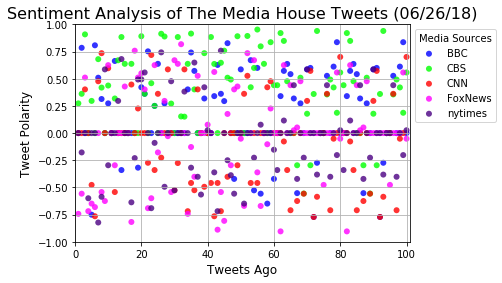

In [177]:
# Create an array of Media Houses with the unique function in the data frame
Media_House = Sentiment_DF["Media"].unique()
# Media_House

# #Plotting the graph for each media source
for media in Media_House:
# Creating a temporary data frame to store for only one media channel at a time
        Temp_DF = Sentiment_DF[Sentiment_DF["Media"] == media]
        
        Sentiment_DF['Media'] = Sentiment_DF['Media'].map(lambda x: x.lstrip('@'))
#Temp_DF
    
        plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"]
                 , marker = "o", linewidth = 0, alpha = 0.8, label = media
                 , facecolors = Temp_DF.Media.map({"BBC": "blue"
                                                   , "CBS" : "lime"
                                                   , "CNN": 'red'
                                                   , "FoxNews":"fuchsia"
                                                   , "nytimes":"indigo"
                                                  })
                )


# # plt.hlines(0,0,np.arange(len(Sentiment_DF["Compound"])),alpha=1)

# # Set the legend 
plt.legend(bbox_to_anchor = (1,1), title="Media Sources", loc='best')

# # Set the labels of x_axis, y_axis & title 
plt.xlabel("Tweets Ago", fontsize=12)
plt.ylabel("Tweet Polarity", fontsize=12)
plt.title("Sentiment Analysis of The Media House Tweets (%s)" % (time.strftime("%x")), fontsize=16)

# #Set the limite of  x_axis and y_axis
plt.xlim(0, 101)
plt.ylim(-1,1)

# # Set the grid
plt.grid(True)

filePath = 'Images'
if not path.exists(filePath):
    makedirs(filePath)

# Save the result to a .png file
plt.savefig("Images/Sentiment Analysis of Media Tweets.png",bbox_inches='tight')
# plt.savefig("Sentiment Analysis of The Media House's Tweets.png",bbox_inches='tight')

plt.show()

In [178]:
# Calculate the mean for each Media House channel & store into a dataframe
Media_Comp_Mean =Sentiment_DF.groupby("Media").mean()["Compound"].to_frame()

#Reset the index 
Media_Comp_Mean.reset_index(inplace=True)

# Media_Comp_Mean

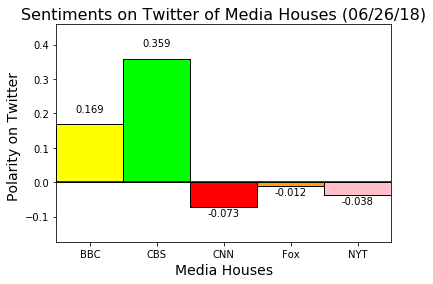

In [179]:
# Set the values for x_axis & y_axis
x_axis = Media_Comp_Mean.index.values
y_axis = Media_Comp_Mean["Compound"]

# Intialize the plots. 
fig,ax = plt.subplots()#  function that returns a tuple containing a figure and axes object(s)

#Set the plot and assign the values like colors etc
bars = ax.bar(x_axis,y_axis
              , align = "edge"
              , width = 1
              , linewidth = 1
              , edgecolor = 'black'
              , color = ["yellow","lime","red","orange","pink"]
             )

# Set the tick(s) of the bar graph
tick_locations = [value + 0.5 for value in range(len(x_axis))]
plt.xticks(tick_locations,["BBC","CBS","CNN","Fox","NYT"])

# If value is positive then put True in the Summary else place False
Media_Comp_Mean["Positive"] = Media_Comp_Mean["Compound"] > 0

# Assign the height based on positive value after allocating True / false value
height = Media_Comp_Mean.Positive.map({True: 0.03 , False: -0.03})

# # Set the value on labels on the bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + height[bars.index(bar)]
            , round(Media_Comp_Mean["Compound"][bars.index(bar)],3)
            , ha = 'center'
            , va = 'bottom'
           )


# Set the x_axis limits
ax.set_xlim(0, len(x_axis))

# Dynamically set the y_axis limits by finding the max & min value of y-axis
ax.set_ylim(min(y_axis)-0.1, max(y_axis) + 0.1)

# Set a horizontal line at y = 0
plt.hlines(0,0,len(x_axis))

# Title of the graph
ax.set_title("Sentiments on Twitter of Media Houses (%s)" % (time.strftime("%x")), fontsize=16)

# Setting the y_axis label
ax.set_ylabel("Polarity on Twitter ", fontsize=14)

# Setting the x_axis label
ax.set_xlabel("Media Houses", fontsize=14)

#Check if output folder exist, create if not exists!
filePath = 'Output'
if not path.exists(filePath):
    makedirs(filePath)
    
# Saving the graph
plt.savefig("Images/Overall_Media_Sentiment_based_on_Twitter.png",bbox_inches='tight')
# plt.savefig("Media_Sentiment_on_Twitter.png",bbox_inches='tight')
plt.show()

In [ ]:
# change the color based on the value
